* Aşağıdaki kod kırmızı ile uyarı yazılarını göstermemeye yarıyor.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Çoklu Doğrusal Regresyon

* Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi 
ifade eden doğrusal fonksiyonu bulmaktır.

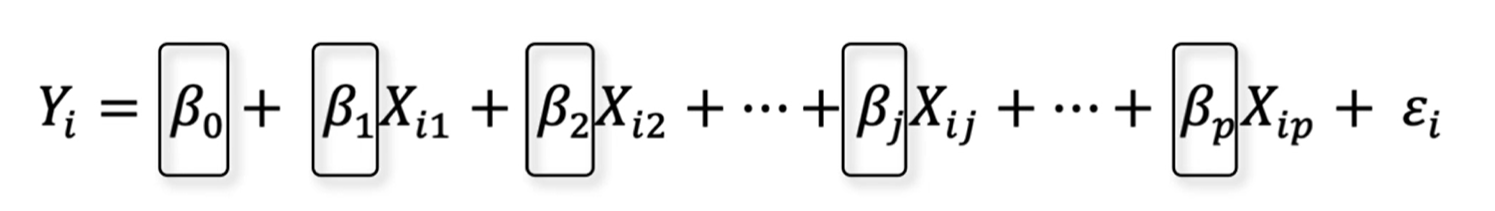
* Beta katsayıları: Model içindeki bağımsız değişkenlerin etkilerini kontrol etmek için kullanılıyor. Bu katsayıları bulmak için çözülmesi gereken denklem aşağıdaki gibidir:

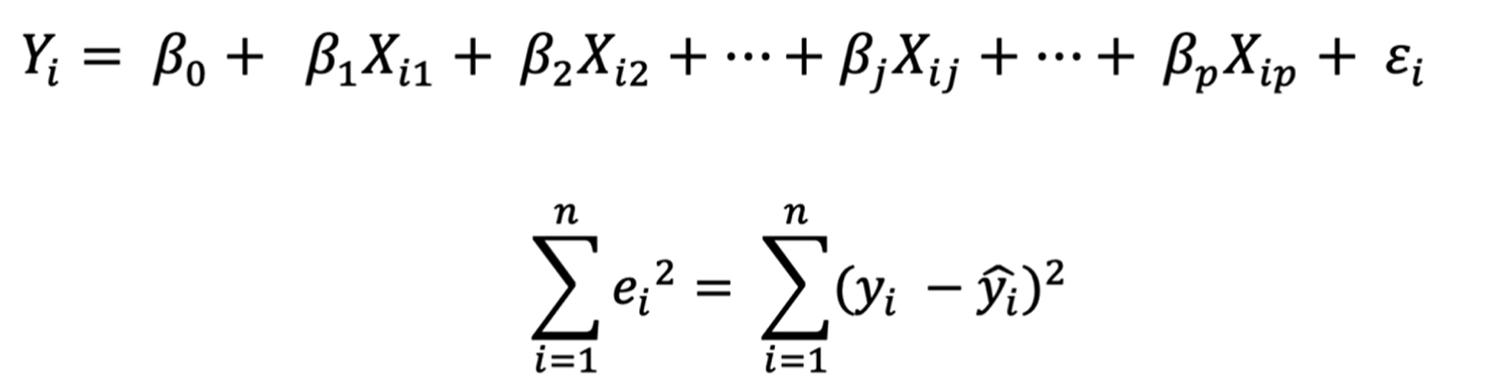

* Aşağıdaki denklemimiz teorik ana kitle denklemimiz

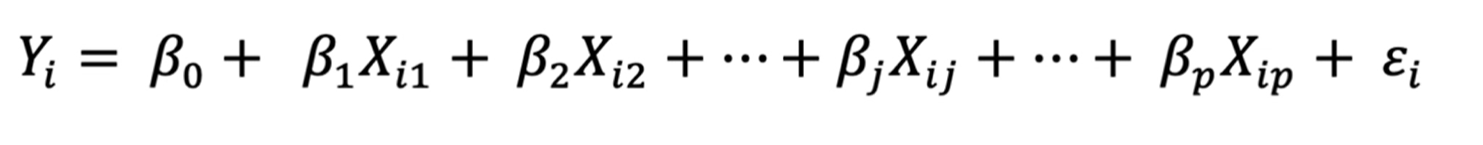

* Aşağıdaki denklem ise örnek üzerinden elde edilen ifadelere göre oluşturulmuş denklemdir. (ei²) ifadesi hataların karesini ifade ediyor. Yani gerçek değerler ile tahmin edilen değerlerin farklarının karesidir.

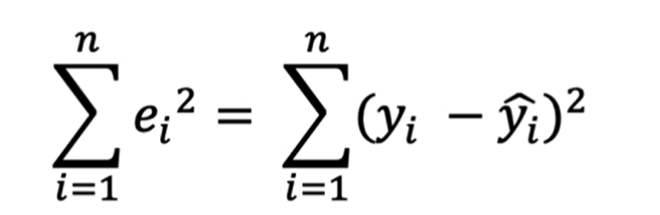

* Aşağıdaki denklem çözüldüğünde beta kat sayılarına erişmiş oluyoruz. X = Bağımsız değişkenleri ifade ediyor. Y ise bağımlı değişkeni ifade ediyor.

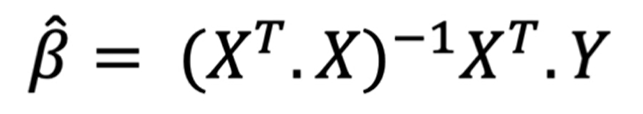

### Doğrusal Regresyon Varsayımları
- Hatalar normal dağılır.- Hatalar birbirinden bağımsızdır ve aralarında otokorelasyon yoktur.
- Her bir gözlem için hata terimleri varyansları sabittir.
- Değişkenler ile hata terimi arasında ilişki yoktur.
- Bağımsız değişkenler arasında çoklu doğrusal ilişki problemi yoktur.

### Regresyon Modellerinin Avantajları

* İyi anlaşılırsa diğer tüm ML ve DL konuları çok rahat kavranır.
* Doğrusallık nedensellik yorumları yapılabilmesini sağlar, bu durum aksiyoner ve stratejik modelleme imkanı verir.
* Değişkenlerin etki düzeyleri ve anlamlılıkları değerlendirilebilir.
* Bağımlı değişkendeki değişkenliğin açıklanma başarısı ölçülebilir.
* Model anlamlılığı değerlendirilebilir.

### Regresyon Modellerinin Dezavantajları

* Varsayımları vardır.
* Aykırı(hata) gözlemlere duyarlıdır

### Çoklu Doğrusal Regresyon: Model

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.iloc[:, 1:len(df)]

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
X = df.drop("Sales", axis = 1)
y = df["Sales"]   # Buradaki tek "[]" numpy array olarak aldırır. Pandas df olarak almak için iki "[[]]" kullanılmalı

In [7]:
X.head()   # bağımsız değişkenimiz

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [8]:
y.head()  # bağımlı değişkenimiz

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [9]:
y = df[["Sales"]]   # Burada kullanıldığı gibi.

In [10]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [11]:
# Statsmodel ile model kurmak

In [12]:
import statsmodels.api as sm

In [13]:
lm = sm.OLS(y, X)   # Burada model nesnemizi oluşturduk.
# lm = Lineer Model kısaltılması

In [14]:
model = lm.fit()    # Burada da modeli fit ediyoruz yani kuruyoruz. 

In [15]:
model.summary()     # Bu Çoklu Doğrusal Regresyon Modelinin Çıktısı

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 29 Jan 2025   Prob (F-statistic):                   2.43e-171
Time:                        11:37:10   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
Radio          0.2222      0.009     23.595      0.000       0.204       0.241
Newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* "R-squared (uncentered)" ifadesi bağımsız değişkenlerin bağımlı değişkendeki değişikliği açıklama yüzdesidir.
* "Adj. R-squared (uncentered)" ifadesi R² ifadesinin düzeltilmiş halidir.
* "F-statistic" F istatistiği modelin anlamlılığını test etmek için kullanılan istatistiktir.
* "Prob (F-statistic)" ifadesi modelin anlamlı olup olmadığı sonucunu veriyor. Yukarıda 0,05'ten küçük bir değer sonucunu verdiği için bu model anlamlıdır diyebiliriz.
* "coef" ifadesi kurulacak olan modeldeki bağımsız değişkenlerin kat sayılarını ifade ediyor. (Artışları temsil ediyor)
* "std err" kat sayıların standart hatasını vermektedir.
* "t ve	P>|t|" ifadeleri yine bize modelin anlamlılığı hakkında bilgi vermektedir.

In [16]:
# scikit-learn ile model kurmak

In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [18]:
model = lm.fit(X, y)

In [19]:
model.intercept_  # Bağımsız değişkenin sabit kat sayısı

array([2.93888937])

In [20]:
model.coef_     # Bağımsız değişkenlerimize ait kat sayılarımız geldi.

array([[ 0.04576465,  0.18853002, -0.00103749]])

### Çoklu Doğrusal Regresyon: Tahmin

**Sales = 2.94 + TV * 0.04 + radio * 0.19 - newspaper * 0.001**
* 2.94 = Beta0 sabiti(kat sayısı) yani intercept_
* 0.04, 0.19, 0.001 = Beta1 kat sayısı yani coef_
* Gazetenin negatif olma nedeni coef_ çıktısında negatif değer döndürmesinden dolayıdır. 

**Diyelim ki 30 birim TV, 10 birim radio ve 40 birim newspaper harcaması olsun. Bunun sonucunda satışlar ne olur?**

In [21]:
2.94 + 30 * 0.04 + 10 * 0.19 - 40 * 0.001 

5.999999999999999

In [22]:
yeniVeri = [[30], [10], [40]]

In [23]:
yeniVeri = pd.DataFrame(yeniVeri).T
yeniVeri

,0,1,2
0,30,10,40


In [24]:
model.predict(yeniVeri)

array([[6.15562918]])

* Başka değerler ile yeniden tahmin

In [25]:
yeniVeri = [[300], [120], [400]]
yeniVeri = pd.DataFrame(yeniVeri).T
yeniVeri

,0,1,2
0,300,120,400


In [26]:
model.predict(yeniVeri)

array([[38.87688782]])

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [29]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [30]:
MSE = mean_squared_error(y, model.predict(X))
MSE

2.784126314510936

* Yukarıdaki hata kareler ortalamasında ilk değer gerçek değerimiz ikinci değer ise model tahmin değerimiz

In [31]:
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

### Çoklu Doğrusal Regresyon: Model Tuning(Model Doğrulama)

In [32]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [33]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [34]:
#sınama seti

from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [36]:
X_train.head()

,TV,Radio,Newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [37]:
y_train.head()

,Sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [38]:
X_test.head()

,TV,Radio,Newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [39]:
y_test.head()

,Sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [40]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [41]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))   # Çıkan hata sonucu train hatasının sonucudur.

1.7369025901470925

In [42]:
# Test hatası
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.4113417558581587

* Yukarıdaki veri setimizi eğitim ve test olacak şekilde iki parçaya böldük. Eğitim üzerinde bir model kurduk ve kurmuş olduğumuz modelimize ilişkin hatamızı hesapladık. Daha sonra ayırmış olduğumuz test setinide göz önünde bulundurarak test seti içinde bir hata hesapladık. 

* k-katlı Cross Validation: Train setine yönelik elde edeceğimiz hatayı daha doğru değerlendirebilmek adına bu yöntemi kullanmış olacağız
* cv = Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

* Yukarıda çıkan sonuç; train seti üzerinden 10 tane farklı hata hesaplandı. Yani train seti kendi içinde 10 parçaya bölündü, 9 parça ile önce model kurulup kalan bir parça ile de tahmin edildi. Sonra diğer parça dışarda bırakılıp dokuz parça ile model kurulup dışarda bırakılan parça tahmin edilmeye çalışıldı. Ve bu sayede on tane hata elde edildi. En sonda ise bunların ortalaması alındığında elimizde tek bir tane train'e ilişkin hata olmuş olacak. Yukarıda çıkan değerler negatif bu durumu düzeltmek ve ortalama hatayı bulmak için aşağıdaki gibi yazabiliriz:

In [45]:
# cv ile elde edilmiş mse değerimiz
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

3.187711520944358

In [46]:
# cv ile elde edilmiş rmse değerimiz
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

1.7854163438661466

In [47]:
np.sqrt(np.mean(-cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_squared_error")))

1.749276312684338

## Ridge Regresyon 

* Amaç hata kareler toplamını minimize eden katsayıları, bu 
katsayılara bir ceza uygulayarak bulmaktır.

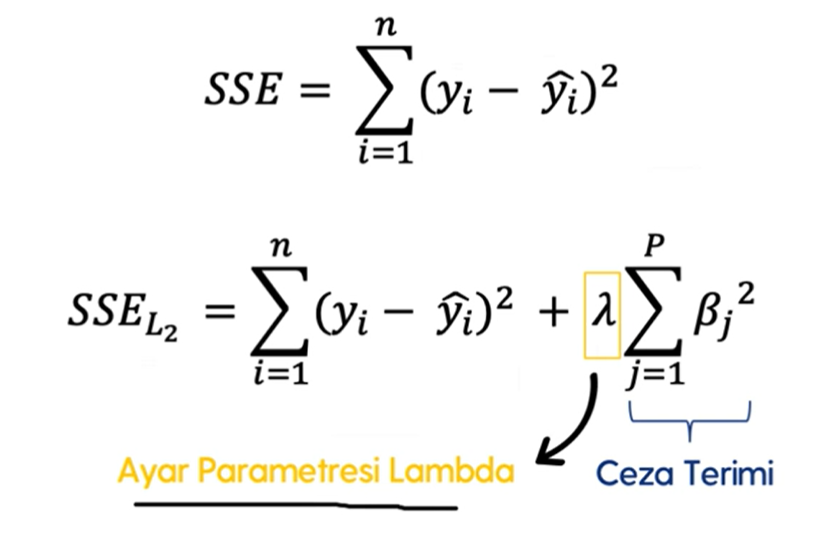

* Aşırı öğrenmeye karşı dirençli.
* Yanlıdır fakat varyansı düşüktür. (Bazen yanlı modelleri daha çok tercih ederiz.)
* Çok fazla paremetre olduğunda EKKya göre daha iyidi
* Çok boyutluluk lanetine karşı çözüm sun
* **Çok boyutluluk laneti: Değişken sayısının gözlem sayısından fazla olması demektir.**
* Çoklu doğrusal bağlantı problemi olduğunda etkilidir.
* **Çoklu doğrusal bağlantı problemi: Bağımszı değişkenler arasında yüksek kolerasyon olması demektir.Bunun anlamı da bir değişkenin bilginin neredeyse aynısını başka bir değişkeninde taşıması anlamına gelir.**
* Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, 
katsayılarını sıfıra yaklaştırır
* λ kritik roldedir. İki terimin (formüldeki) göreceli etkilerini kontrol etmeyi sağlar.
* λ için iyi bir değer bulunması önemlidir. Bunun için CV(Cross Validation) yöntemi kullanılır..

# λ Ayar Parametresinin Belirlenmesi

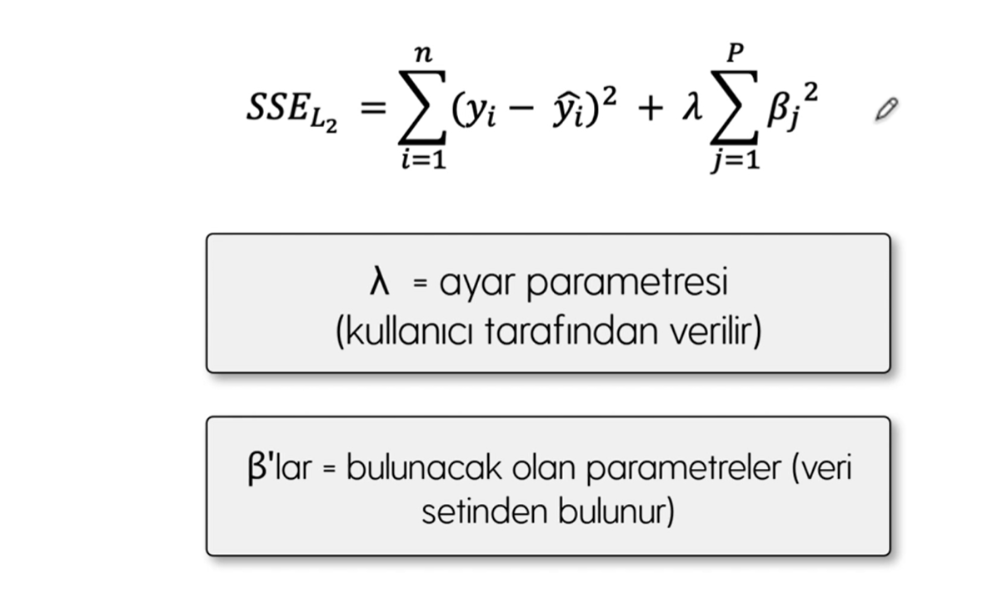

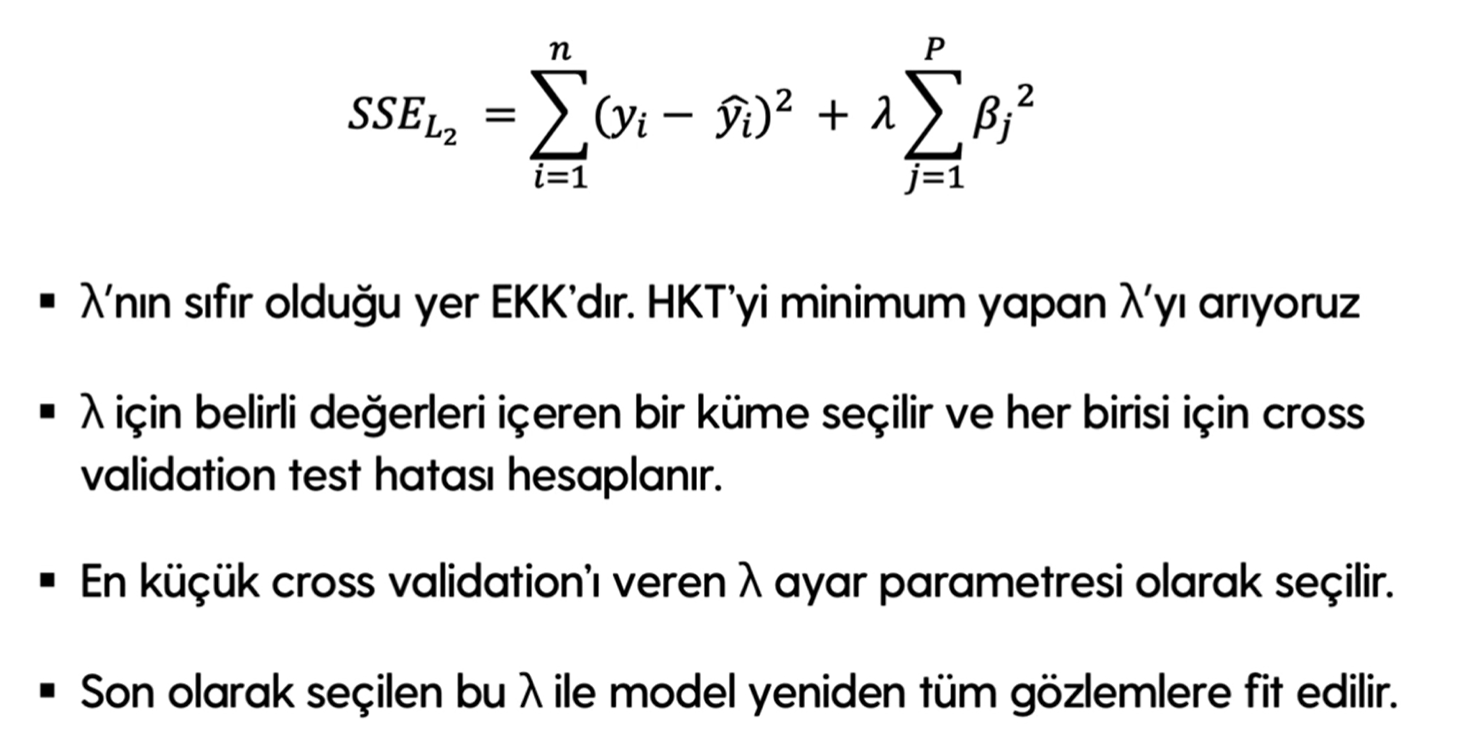

### Ridge Regresyon: Model

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [49]:
df = pd.read_csv("Hitters.csv")
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [50]:
df = df.dropna()  # Eksik verileri sildik

In [51]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) 
# Veri setindeki kategorik değişkenleri dumi türüne çevirdik. One hat encoding yaklaşımı yapmış olduk

In [52]:
y = df["Salary"]   # Bağımlı değişkenleri y'ye atadık.

In [53]:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype("float64")
# Dumi işlemi sonrasında değişkenleri ve bağımlı değişkenleri drop ederek "X_" diye bir isimlendirme yaptık.

In [54]:
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
# Burada ise orijinal veri seti ile düşürdüğümüz değişkeni bir araya getirdik.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

* Özetle yukarıda yapmış olduğumuz işlem: Kategorik değişkenleri dummi değişkenlerine çevirip dummi değişkenleri veri setinde tutarak diğer değişkenleri ve bağımlı değişkeni, bağımsız değişkenlerin dışında bırakmış olduk. Sonrasında test-train ayrımı için daha önceden yukarıda kullanmış olduğumuz "train_test_split" fonksiyonunu kullanarak veri setimizi 25'e 75 olacak şekilde ayrıma işlemine tabi tuttuk.

In [56]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [57]:
df.shape

(263, 20)

* Amacımız bu veri seti içerisinde verilen "Salary" ismi verilen yani oyuncuların maaşını ifade eden maaş değişkenini diğer değişkenleri kullanarak tahmin etmeye çalışmaktır.
* Veri setinin hikayesi: Baseball oyuncularına ait bir veri setidir. Bu veri seti içinde oyunucular hakkında maaş, takımları, attıkları sayı, koşuları vb. birtakım baseball literatürüne yönelik olarak bilgiler vardır.
* Keşifçi veri analizi adımları atlanarak model eğitme kısmına geçilmiştir.

In [58]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train) 
ridge_model

Ridge(alpha=5)

In [59]:
ridge_model.coef_    # Katsayılar

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [60]:
ridge_model.intercept_   # sabit katsayımız

-3.4251968687162844

In [61]:
lambdalar = 10**np.linspace(10, -2, 100)*0.5   # Hiperparametre değerleri oluşturduk

In [62]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [63]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)   #set_params ifadesi parametreleri set etmek için ayarlamak için kullanılır.
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

* Yukarıdaki döngünün amacı: Oluşturmuş olduğumuz lambda değerlerine karşı kat sayıların nasıl değişecek olduğunu gözlemlemeye çalışmak.
* Önce Ridge model nesnesini oluşturuyoruz. Sonra katsayıları tutabilmek için boş bir liste oluşturuyoruz. Farklı farklı kat sayıları elde edebilmek için bir for döngüsü yazıyoruz. "set_params" içine yazılan "alpha = i" ifadesi lambdaların içerisini gezecek herbir yakalamış olduğu lambda değerini "ridge_model" nesnesinin alpha parametresi olarak atayacak. Sonrasında bu model nesnesine parametreleri atadıktan sonra modeli fit ettiricez. Son olarakta katsayılar ismindeki oluşturmuş olduğumuz listenin içerisine herbir iterasyonda herbir lambda,alpha değerine karşılık gelecek şekilde oluşturulan katsayıları bir yere topla diyoruz. Elemanı "coef" içerisine eklemiş olacak.
* Not: Her lambda denemesinde birçok katsayı oluşacak kısaca her lambdanın değişken sayısı(19 tane) kadar katsayısı olacak

In [64]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

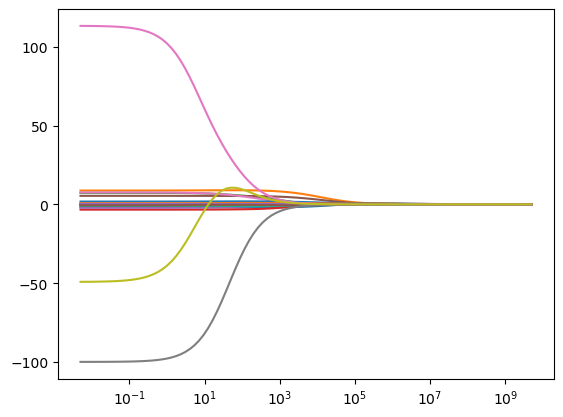

In [65]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale("log")  # Burada ölçek değiştirme işlemi yaptık. 

* Yukarıdaki logaritmik grafikte farklı renkler katsayıların değerlerini ifade ediyor. Aşağıda artan sıradaki log'lar ise lambda değerlerini ifade etmektedir. Grafiğin anlatmak istediği ise; Farklı lambda değerlerine karşılık elimizdeki parametrelerin katsayıların nasıl değiştiği bilgisini vermektedir. Lambdalar arttıkça sıfıra yaklaşmıştır. 

### Ridge Regresyon: Tahmin

In [66]:
ridge_model = Ridge().fit(X_train, y_train)

In [67]:
y_pred = ridge_model.predict(X_train)

In [68]:
y_pred[0:10]   # Bunlar tahmin edilen değerler

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [69]:
# gerçek değerler;
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [70]:
# train setimizin hatasına bakacak olursak;
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

289.34470696006565

In [71]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

351.3931585606329

* Yukarıdaki iki değer sonucu için açıklama yapılacak olursa; ilk sonucumuz hata kareler ortalamasının train veri seti üzerinden doğrulama edilmemiş RMSE değerimiz 289 çıktı. Aşağıda ise cross validation ile 10 katlı yapmış olduğumuz hata hesaplama sonucumuz 351 değerini elde ettik.
* Ayrıca hatanın düşük olması her zaman iyi olduğu anlamına gelmez. Bu yüzden CV kullanılarak bulunan hata daha doğru bir hata verdi. Bu yüzden ilkinde çıkan hataya ilkel train hatası diyebiliriz. 

In [72]:
# Test Hatası;
y_pred = ridge_model.predict(X_test)

In [73]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

356.8082905730246

### Ridge Regresyon: Model Tuning(Doğrulama)

In [74]:
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730246

In [75]:
np.random.randint(0, 100, 10)

array([20, 47, 82, 16,  5, 34, 81, 95, 54, 84])

In [76]:
lambdalar1 = np.random.randint(0, 1000, 100)

In [77]:
lambdalar2 = 10**np.linspace(10, -2, 100)*0.5

In [78]:
ridgecv = RidgeCV(alphas = lambdalar2, scoring = "neg_mean_squared_error", cv = 10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [79]:
ridgecv.alpha_

1526927.7544167063

In [80]:
# Final Modeli
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [81]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

385.8643856146937

In [82]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 94, 694, 653, 655, 324, 281, 448, 384, 635, 191, 657,  25, 338,
       117, 246, 103, 804, 279, 757, 217, 610, 949, 733, 236, 767, 316,
       391,  19, 937,  41, 763, 423, 952, 597, 152, 853, 700, 466, 960,
       715, 134, 204, 426, 547, 456, 328, 740, 233, 792, 791, 708, 476,
        86, 687, 594, 547, 267, 756, 787,  16, 185, 718, 631, 657, 592,
       449, 288, 763, 417, 580, 201, 552, 489, 245, 682, 165, 560, 379,
        47, 163, 868, 610,  20, 263, 158, 284, 582, 516, 248,   2, 998,
       994,  49, 865, 715, 398, 665, 113, 879, 335]),
        cv=10, scoring='neg_mean_squared_error')

In [83]:
ridgecv.alpha_

16

In [84]:
# Final Modeli
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [85]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.3699926835377

## Lasso Regresyon

* Amaç hata kareler toplamını minimize eden katsayıları bu 
katsayılara bir ceza uygulayarak bulmaktır
* Ridge Regresyona benzemektedir..

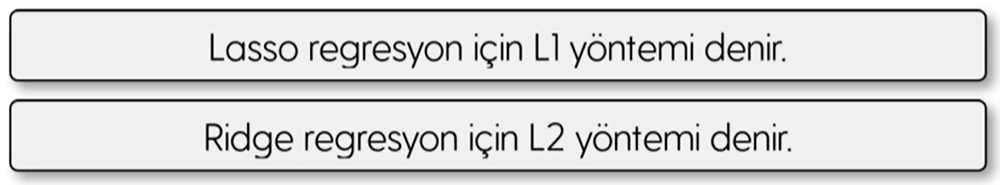

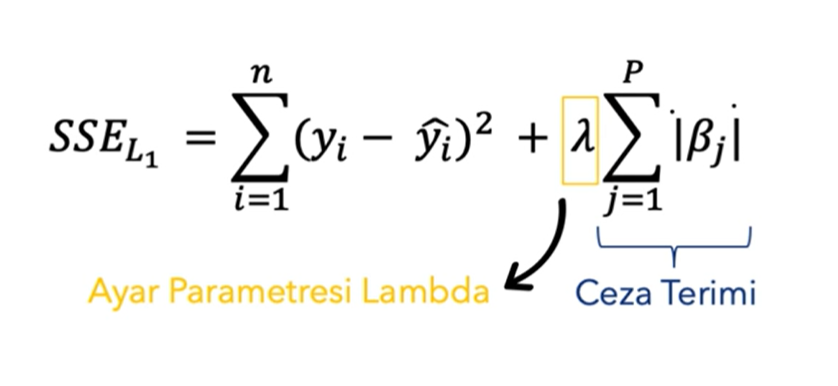

* Ridge regresyonun ilgili-ilgisiz tüm değişkenleri modelde bırakma 
dezavantajını gidermek için önerilmişti
* Lasso'da katsayıları sıfıra yaklaştırır.
* Fakat L1 normu λ yeteri kadar büyük olduğunda bazı 
katsayıları sıfır yapar. Böylece değişken seçimi yapmış olur
* λ'nın doğru seçilmesi çok önemlidir, burada da CV kullanılır.
* Ridge ve Lasso yöntemleri birbirinden üstün değildir.

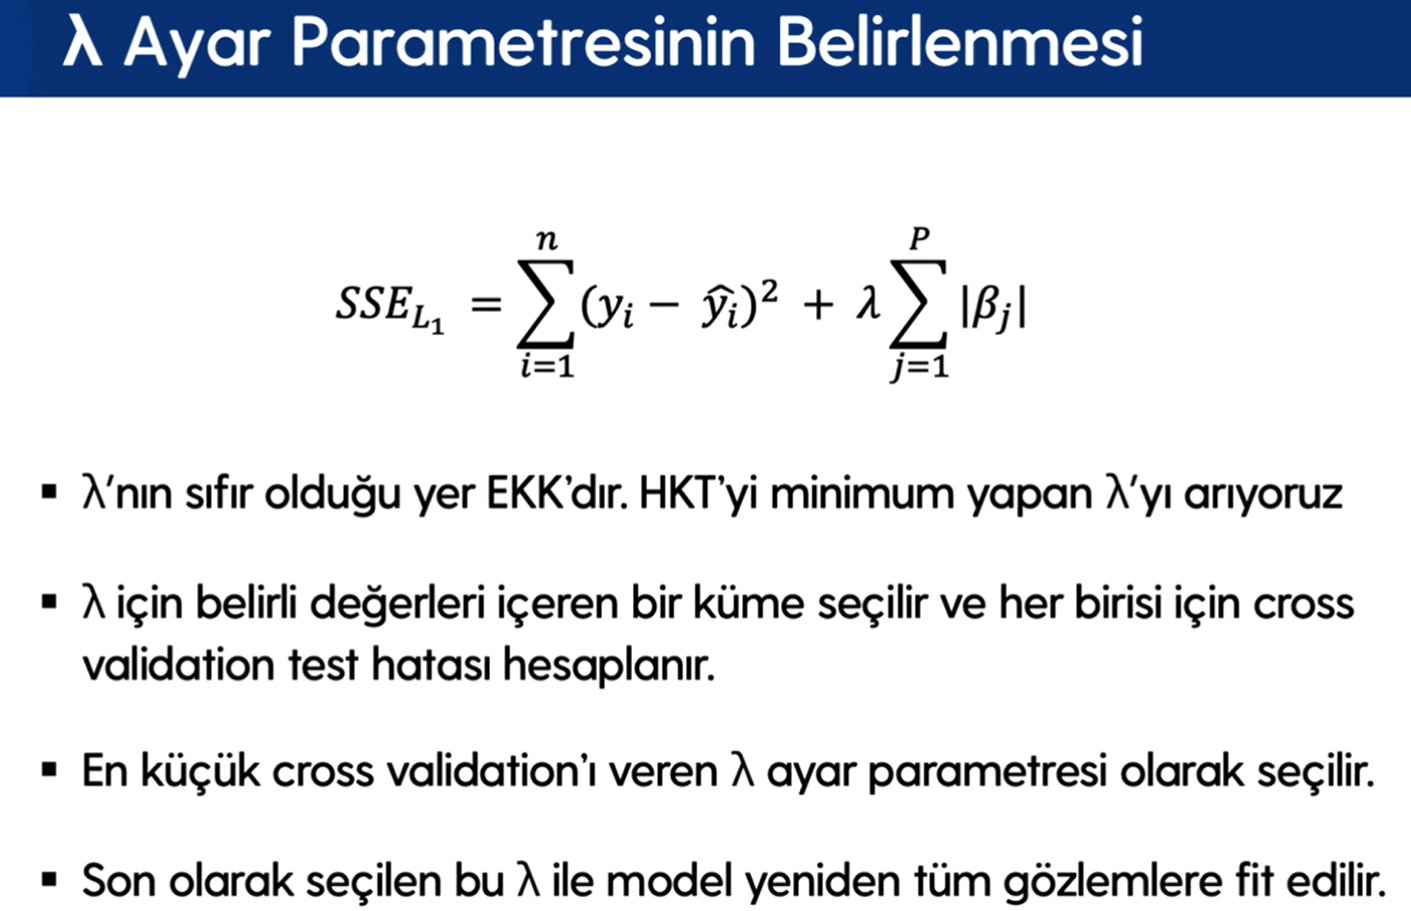

### Lasso Regresyon: Model

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

In [87]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"] 

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype("float64")

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [88]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [89]:
df.shape

(263, 20)

In [90]:
lasso_model = Lasso().fit(X_train, y_train)

In [91]:
lasso_model  # alpha default olarak 1 olarak atanmıştır

Lasso()

In [92]:
lasso_model.intercept_

-5.587450677336733

In [93]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [94]:
# Farklı lambda değerlerine karşılık katsayılar 
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10, -2, 100)*0.5

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

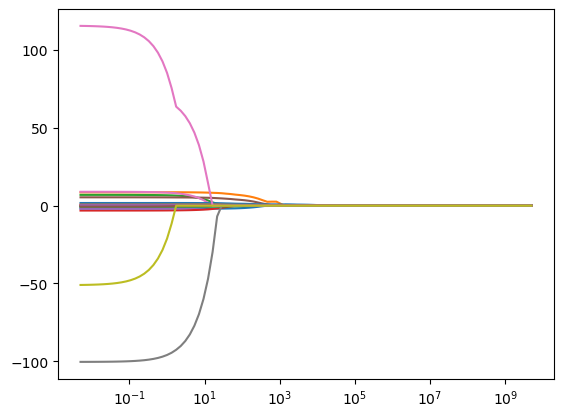

In [95]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

### Lasso Regresyon: Tahmin

In [96]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [97]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [98]:
y_pred = lasso_model.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))   # Optimize edilmemiş ilkel test hatamız

356.0975884554034

In [100]:
r2_score(y_test, y_pred)  # r2 score: Bağımsız değişkenlerce bağımlı değişkendeki değişikliğin açıklanma yüzdesidir. 

0.41422798132366156

### Lasso Regresyon: Model Tuning

In [101]:
alphas = 10**np.linspace(10, -2, 100)*0.5

In [102]:
lassoCVModel = LassoCV(alphas = alphas,cv = 10, max_iter = 100000).fit(X_train, y_train)

In [103]:
lassoCVModel.alpha_

201.85086292982749

In [104]:
lassoTuned = Lasso().set_params(alpha = lassoCVModel.alpha_).fit(X_train, y_train)

In [105]:
lassoTuned = Lasso(alpha = lassoCVModel.alpha_).fit(X_train, y_train)  # Üst hücredeki ile aynı sadece yazımı farklı

In [106]:
y_pred = lassoTuned.predict(X_test)

In [107]:
np.sqrt(mean_squared_error(y_test, y_pred))   # Optimize edilmemiş ilkel test hatamız

363.6832708037447

In [108]:
pd.Series(lassoTuned.coef_, index = X_train.columns)  
# Bu kodda Tune edilmiş lasso modelimizin katsayılarını değişkenlerin isimleriyle birlikte çağırdık.

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

## ElasticNet Regresyon

* Amaç hata kareler toplamını minimize eden katsayıları bu 
katsayılara bir ceza uygulayarak bulmaktır
* 
ElasticNet LI ve L2 yaklaşımlarını birleştirir.

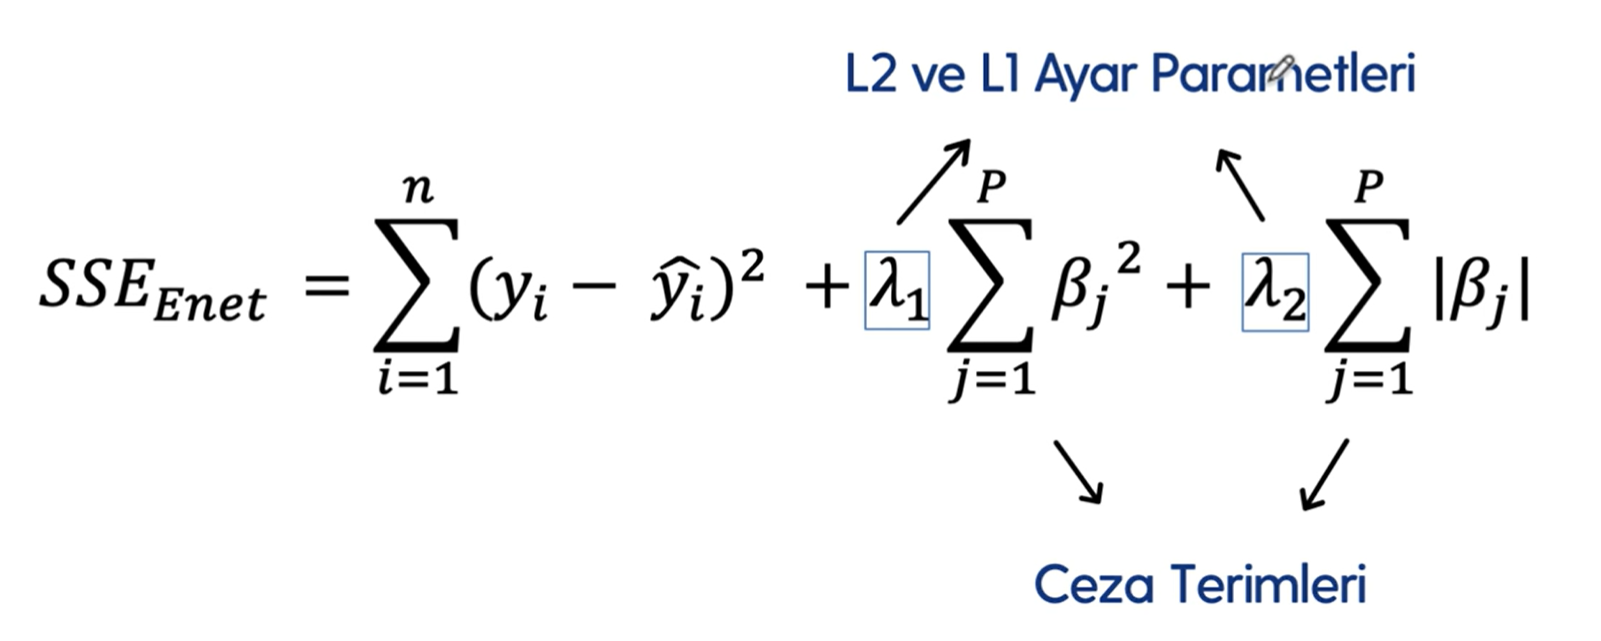

### ElasticNet Regresyon: Model ve Tahmini

In [109]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [110]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"] 

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype("float64")

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [111]:
enetModel = ElasticNet().fit(X_train, y_train)

In [112]:
enetModel.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [113]:
enetModel.intercept_

-6.46595560211324

In [114]:
# Tahmin
enetModel.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [115]:
enetModel.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [116]:
y_pred = enetModel.predict(X_test)

In [117]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181246

In [118]:
r2_score(y_test, y_pred)

0.41070222469326867

### ElasticNet Regresyon: Model Tuning

In [119]:
enetCVModel = ElasticNetCV(cv = 10).fit(X_train, y_train)

In [120]:
enetCVModel.alpha_

5230.764736479864

In [121]:
enetCVModel.intercept_

-38.51940558394301

In [122]:
enetCVModel.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [123]:
# Final Modeli
enetTuned = ElasticNet(alpha = enetCVModel.alpha_).fit(X_train, y_train)

In [124]:
y_pred = enetTuned.predict(X_test)

In [125]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.1528056321879

In [126]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    *,
    l1_ratio=0.5,
    fit_intercept=True,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * ||w||_1 + 0.5 * b * ||w||_2^2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read mo

# **Done**